<a href="https://colab.research.google.com/github/Valelugo/Business-Inteligence/blob/main/Reto_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer parcial analítica**

#**Naive Bayes: primer modelo**
Se propone un modelo para analizar 9 variables de entrada de jugadores de la NBA y una variable de salida para determinar si los partidos jugados superan o no el promedio.

0. Cargar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargar base de datos

In [ ]:
nxl='/content/drive/MyDrive/Base de datos parcial.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]
XDB.head(100)

XDB=XDB.dropna()
display(XDB)

#Se separan las variables de entrada y salida
XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']] #Variables de entrada
yd=XDB[['games_played']] #Variable de salida - Variable pronóstico




,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


In [ ]:
#Antes de eliminar las filas con datos faltantes
total_datos1 = len(XDB)
print(f"Número total de datos: {total_datos1}")

porcentaje_por_variable1 = (XDB.count() / total_datos1) * 100
print("\nPorcentaje de datos por variable:")
print(porcentaje_por_variable1)


# Suponiendo que 'XDB' es tu DataFrame
promedio_games_played = XDB['games_played'].mean()

# Crea una nueva columna 'supera_promedio' que indica si la persona supera el promedio
XDB['supera_promedio'] = XDB['games_played'] > promedio_games_played

# Calcula el porcentaje de personas que superan el promedio
porcentaje_supera = XDB['supera_promedio'].sum() / len(XDB) * 100

# Calcula el porcentaje de personas que no superan el promedio
porcentaje_no_supera = 100 - porcentaje_supera

# Imprime los resultados
print(f"Porcentaje de personas que superan el promedio: {porcentaje_supera:.2f}%")
print(f"Porcentaje de personas que no superan el promedio: {porcentaje_no_supera:.2f}%")


Número total de datos: 445

Porcentaje de datos por variable:
salary              100.0
age                 100.0
height              100.0
weight              100.0
games_started       100.0
minutes_per_game    100.0
assists             100.0
blocks              100.0
steals              100.0
games_played        100.0
dtype: float64
Porcentaje de personas que superan el promedio: 42.70%
Porcentaje de personas que no superan el promedio: 57.30%


La base de datos, compuesta por 445 jugadores, registra que aquellos que sí superan el promedio de partidos jugados equivale al 42,70%, mientras que los demás no superan. (57,30%)

In [ ]:
promedio_games_played = XDB['games_played'].mean()
print(f"El promedio de games_played es: {promedio_games_played}")

El promedio de games_played es: 369.5662921348315


In [ ]:

# Modifica la columna 'games_played' en el DataFrame XDB
XDB['games_played'] = (XDB['games_played'] > promedio_games_played).astype(int)

# Asigna la columna modificada a la variable yd
yd = XDB['games_played']

2. Se procede a implementar el modelo.

In [ ]:
from sklearn.naive_bayes import GaussianNB

XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']] #Variables de entrada
yd=XDB[['games_played']] #Variable pronóstico

mnb=GaussianNB()
mnb.fit(XD,yd)


#Obtenemos la información del modelo
u=mnb.theta_ #Obtenemos la media
print("la media de las variables es: \n", u)

var=mnb.var_ #Se calculan las varianzas, me indica que tan alejados están los datos de la media
sigma=np.sqrt(var) #Se calcula la desviación
print("La desviación de las variables es: \n", sigma)

#Se determinan los límites superiores e inferiores de las tres variables
LS=u+sigma
LI=u-sigma

print("El limite superior de las variables es \n", LS)
print("El limite inferior de las variables es \n", LI)

la media de las variables es: 
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La desviación de las variables es: 
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El limite superior de las variables es 
 [[6.31875042e+06 1.89546297e+02 2.44563267e+02 3.86806824e+02
  2.49397853e+02 1.83831014e+02 1.66837383e+02 1.65751861e+02
  1.65961544e+02]
 [1.34983554e+07 1.95868149e+02 2.44666208e+02 3.92137252e+02
  7.41102540e+02 1.92171542e+02 1.67888523e+02 1.65925468e+02
  1.66204712e+02]]
El limite inferior de las variables

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. Se evalúan las características de un jugador.

In [ ]:
#Evaluar un registro
from sklearn.naive_bayes import GaussianNB

mnb=GaussianNB() #Aloja el modelo
mnb.fit(XD,yd) #Entrena el modelo

XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]
ydp=mnb.predict(XDS) #Se obtiene la predicción
print("La predicción del registro es:\n", ydp)

if ydp==0:
  print("El registro no supera el promedio de games_played")

if ydp==1:
  print("El registro supera el promedio de games_played")

La predicción del registro es:
 [0]
El registro no supera el promedio de games_played


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Teniendo en cuenta la información del jugador, es posible afirmar que no supera el promedio de partidos jugados.

4. Se evalúa el desempeño del modelo.

In [ ]:
from sklearn.metrics import confusion_matrix

#Haga un barrido de los datos
ydp2=mnb.predict(XD) #Haga el pronóstico para los datos base

cm=confusion_matrix(yd,ydp2)
print("La matriz de confusión es: \n", cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

#Métricas de desempeño
Ex=(VP+VN)/(VP+VN+FP+FN) #Exactitud: Comportamiento general preaprobando
print("La exactitud del modelo es: \n", Ex)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error: Comportamiento general no preaprobando
print("La tasa de error del modelo es: \n", TE)

Se=VP/(VP+FN) #Sensibilidad: Comportamiento correcto preaprobando
print("La sensibilidad del modelo es: \n", Se)

Sp=VN/(VN+FP) #Especificidad: Comportamiento correcto no preaprobando
print("La especificidad del modelo es: \n", Sp)

Pr=VP/(VP+FP) #Precisión: Comportamiento correcto preaprobando
print("La precisión del modelo es: \n", Pr)

PrNeg=VN/(VN+FN) #Precisión negativa: Comportamiento correcto no preaprobando
print("La precisión negativa del modelo es: \n", PrNeg)


La matriz de confusión es: 
 [[236  19]
 [ 76 114]]
La exactitud del modelo es: 
 0.7865168539325843
La tasa de error del modelo es: 
 0.21348314606741572
La sensibilidad del modelo es: 
 0.6
La especificidad del modelo es: 
 0.9254901960784314
La precisión del modelo es: 
 0.8571428571428571
La precisión negativa del modelo es: 
 0.7564102564102564


#**Árbol de decisión: segundo modelo**
Se analiza un modelo para determinar la influencia de las variables de un jugador en el número de partidos jugados.

0. Descargar librerías de trabajo.

In [ ]:
#Librerías científicas
import numpy as np
import pandas as pd

#librerías arbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargar base de datos.

In [ ]:
nxl='/content/drive/MyDrive/Base de datos parcial.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0) #Información estudiantes
XDB=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]
XDB.head(100)

#Se separan las variables de entrada y salida
XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']] #Variables de entrada
yd=XDB[['games_played']] #Variable de salida - Variable pronóstico

XDB.dropna()
display(XDB)

,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


In [ ]:
# Calcula el promedio de 'games_played'
promedio_games_played = XDB['games_played'].mean()

# Modifica la columna 'games_played' en el DataFrame XDB
XDB['games_played'] = (XDB['games_played'] > promedio_games_played).astype(int)

# Asigna la columna modificada a la variable yd
yd = XDB['games_played']

2. Se procede con la implementación del modelo.

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data #Crea la gráfica
from sklearn.tree import export_graphviz #Lo exporta a PNG

ve=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']
dot_data=export_graphviz(mar, feature_names=ve) #Crear el gráfico
graph=graph_from_dot_data(dot_data)
graph.write_png('ArbolDecision.png')

True

3. Se procede con el pronóstico de jugadores que no superan el promedio de torneos.

In [ ]:
# Conteo de estudiantes admitidos
admitted_count = XDB['games_played'].value_counts()[1]

# Conteo de estudiantes no admitidos
not_admitted_count = XDB['games_played'].value_counts()[0]

print("Jugadores que superan el promedio:", admitted_count)
print("Jugadores que no superan el promedio:", not_admitted_count)

Jugadores que superan el promedio: 190
Jugadores que no superan el promedio: 255


4. Determinar el número de nodos puros.

In [ ]:
# Considerar la estructura del árbol
tree = mar.tree_

# Conteo de los nodos puros
pure_nodes_count = 0

for node_id in range(tree.node_count):
    # Comprueba si el nodo es un nodo hoja, es decir, un nodo que no tiene hijos y representa una decisión final o una predicción.
    if tree.children_left[node_id] == tree.children_right[node_id]:
        # Comprueba si es un nodo puro(all samples belong to the same class)
        if tree.impurity[node_id] == 0:
            pure_nodes_count += 1

# Print the number of pure nodes
print("Number of pure nodes:", pure_nodes_count)

Number of pure nodes: 6


5. LLevar a cabo la evaluación del jugador hipotético.

In [ ]:
# Define los datos del candidato
candidato_data = [[5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]]

# Crea un DataFrame con los datos del candidato
candidato_df = pd.DataFrame(candidato_data, columns=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'])

# Carga el modelo del árbol de decisión (asumiendo que ya lo has entrenado)
# mar = DecisionTreeClassifier()  # Reemplaza con tu modelo entrenado
# mar.fit(XD, yd)  # Reemplaza XD e yd con tus datos de entrenamiento

# Obtén la predicción para el candidato
prediccion = mar.predict(candidato_df)[0]

# Obtén la probabilidad de pertenencia a cada clase
probabilidades = mar.predict_proba(candidato_df)[0]

# Imprime la predicción y las probabilidades
print("Predicción:", prediccion)
print("Probabilidades:", probabilidades)

# Obtén el nodo hoja al que pertenece el candidato
nodo_hoja = mar.apply(candidato_df)[0]

# Recorre el árbol para encontrar la regla
regla = ""
nodo_actual = 0
nombres_columnas = candidato_df.columns  # Obtener los nombres de las columnas

while mar.tree_.children_left[nodo_actual] != mar.tree_.children_right[nodo_actual]:
    nombre_variable = nombres_columnas[mar.tree_.feature[nodo_actual]]  # Obtener el nombre de la variable
    if candidato_df.iloc[0, mar.tree_.feature[nodo_actual]] <= mar.tree_.threshold[nodo_actual]:
        regla += f"{nombre_variable} <= {mar.tree_.threshold[nodo_actual]}, "
        nodo_actual = mar.tree_.children_left[nodo_actual]
    else:
        regla += f"{nombre_variable} > {mar.tree_.threshold[nodo_actual]}, "
        nodo_actual = mar.tree_.children_right[nodo_actual]

# Imprime la regla
print("Regla:", regla[:-2])  # Elimina la coma y el espacio final

Predicción: 1
Probabilidades: [0.16666667 0.83333333]
Regla: age > 26.5, games_started <= 84.0, games_started > 38.0, assists <= 0.6500000059604645


6. Evaluar el comportamiento del modelo.

In [ ]:
ydp=mar.predict(XD) #Pronóstico sobre la base de datos original
cm=confusion_matrix(yd, ydp)
print("La matriz de confusión es: \n", cm)

VN=cm[0,0]; FP=cm[0,1];FN=cm[1,0]; VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
PredNeg=VN/(VN+FN)

print("La exactitud es: ", Exactitud)
print("La sensibilidad es: ", Sensibilidad)
print("La especificidad es: ", Especificidad)
print("La precision es: ", Precision)
print("La tasa de error es: ", TasaError)
print("La presición negativa es:", PredNeg)

La matriz de confusión es: 
 [[247   8]
 [ 12 178]]
La exactitud es:  0.9550561797752809
La sensibilidad es:  0.9368421052631579
La especificidad es:  0.9686274509803922
La precision es:  0.956989247311828
La tasa de error es:  0.0449438202247191
La presición negativa es: 0.9536679536679536


#**Método clusterización: tercer modelo**
El objetivo del caso es agrupar el número de jugadores para determinar si tienen tendencia a una superar el promedio de torneos jugados o no.

0. Implementación del modelo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos.

In [ ]:
nxl='/content/drive/MyDrive/Base de datos parcial.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]
XDB=XDB.dropna()
display(XDB)

XD=np.array(XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']])
promedio=XDB['games_played'].mean()
XDB['games_played']=np.where(XDB['games_played']>promedio,1,0)
yd=np.array(XDB['games_played'])


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


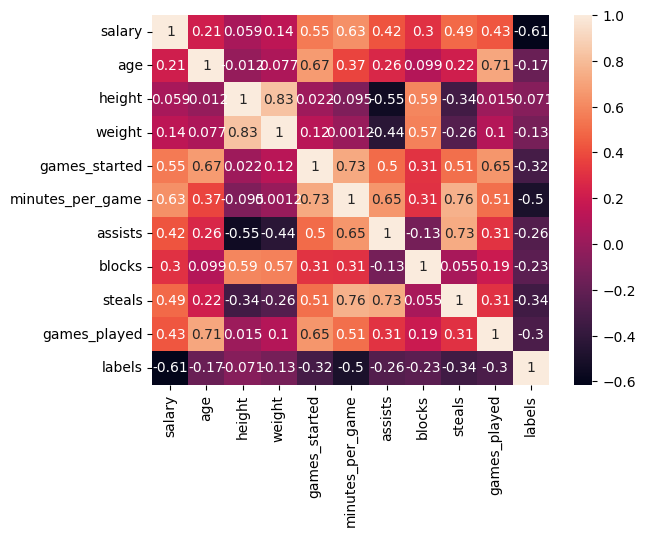

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


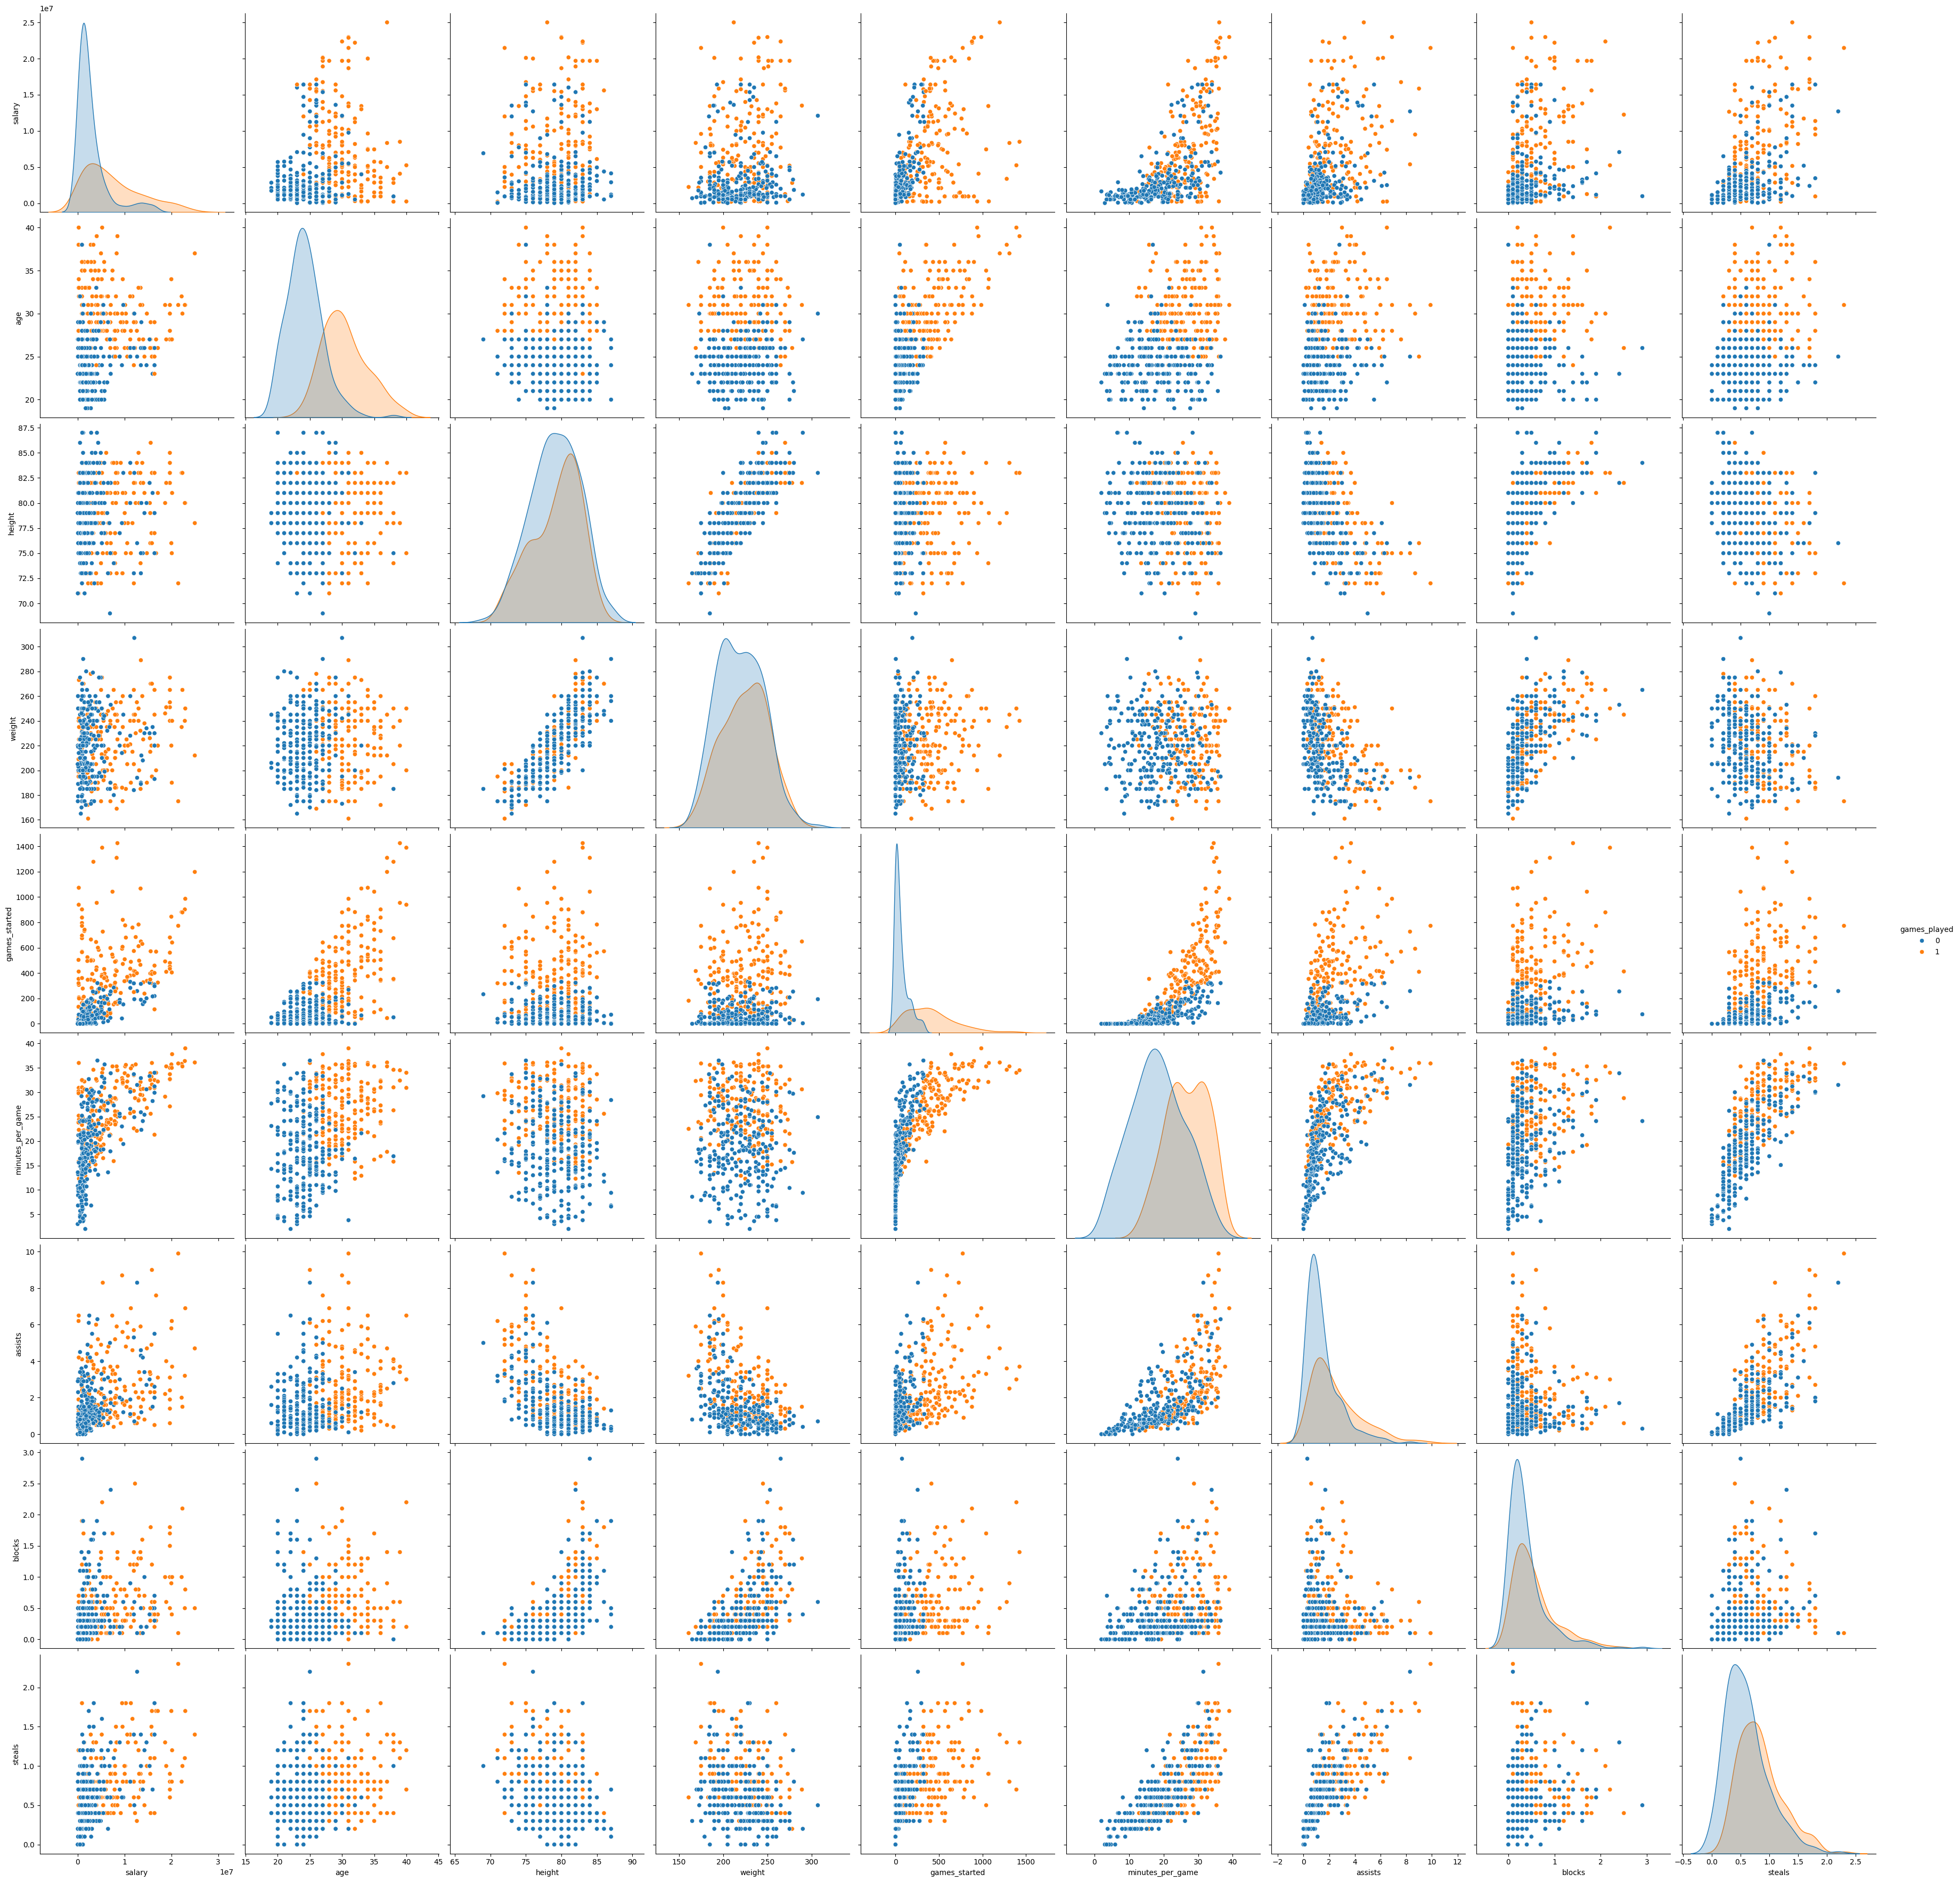

In [ ]:
#Para mirar correlaciones y variables importantes (son cuatro porque son las variables trabajadas)
plt.figure()
sns.heatmap(XDB.corr(), annot=True)
plt.show()


sns.pairplot(XDB.dropna(), hue='games_played', size=4, vars=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'],kind='scatter')



Observando la matriz de correlación, es posible determinar que la variable de entrada "age" mantiene una mayor correlación con la variable de salida "games_played" (0,71). A su vez, las variables de entrada con mayor correlación son "Height" y "Weight". (0,83)

2. Se procede con la clusterización.

In [ ]:
XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd=XDB[['games_played']]

#Se van a crear cinco montoncitos de datos (perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc, init='random', random_state=42) #Son números aleatorios
mkm.fit(XD, yd)
centroids=mkm.cluster_centers_
ydc=mkm.labels_
print('Los centroides son:\n', centroids)


Los centroides son:
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01]]


In [ ]:
#Cómo quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adiciona a la tabla el cluster al que pertenece el solicitante

#Caracterizamos los centroides
ND=np.bincount(labels)
print('El tamaño de los clusters es: \n', ND)
NSup=XDB.groupby('labels').agg({"games_played":lambda x:(x==1).sum()})
NNSup=XDB.groupby('labels').agg({"games_played":lambda x:(x==0).sum()})
print("El número de jugadores que superan promedio por cluster es: \n", NSup)
print("El número de jugadores que no superan promedio por cluster es: \n", NNSup)

#Se procede con la estimación de los procentajes de preaprobación
NSup['games_played']=NSup['games_played']/ND
NNSup['games_played']=NNSup['games_played']/ND
print("El porcentaje de jugadores que superan promedio por cluster es: \n", NSup)
print("El porcentaje de jugadores que no superan promedio por cluster es: \n", NNSup)

El tamaño de los clusters es: 
 [ 49 111  16  55 214]
El número de jugadores que superan promedio por cluster es: 
         games_played
labels              
0                 33
1                 52
2                 16
3                 43
4                 46
El número de jugadores que no superan promedio por cluster es: 
         games_played
labels              
0                 16
1                 59
2                  0
3                 12
4                168
El porcentaje de jugadores que superan promedio por cluster es: 
         games_played
labels              
0           0.673469
1           0.468468
2           1.000000
3           0.781818
4           0.214953
El porcentaje de jugadores que no superan promedio por cluster es: 
         games_played
labels              
0           0.326531
1           0.531532
2           0.000000
3           0.218182
4           0.785047


In [ ]:

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels
display(XDB)

#caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
NSup=XDB.groupby('labels').agg({"games_played":lambda x:(x==1).sum()})
NNsup=XDB.groupby('labels').agg({"games_played":lambda x:(x==0).sum()})
print("El número de jugadores que superan el promedio por cluster es:\n",NSup)
print("El número de jugadores que no superan el promedio por cluster es:\n",NNsup)

#Se procede con la estimación de los porcentajes de preaprobación
NSup['games_played']=NSup['games_played']/ND
NNsup['games_played']=NNsup['games_played']/ND
print("El porcentaje de  jugadores que superan el promedio por cluster es:\n",NSup)
print("El porcentaje de jugadores que no superan el promedio por cluster es:\n",NNsup)

,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played,labels
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1,4
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1,2
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,0,4
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,0,4
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,0,4
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,0,1


El tamaño de los clusters es:
 [ 49 111  16  55 214]
El número de jugadores que superan el promedio por cluster es:
         games_played
labels              
0                 33
1                 52
2                 16
3                 43
4                 46
El número de jugadores que no superan el promedio por cluster es:
         games_played
labels              
0                 16
1                 59
2                  0
3                 12
4                168
El porcentaje de  jugadores que superan el promedio por cluster es:
         games_played
labels              
0           0.673469
1           0.468468
2           1.000000
3           0.781818
4           0.214953
El porcentaje de jugadores que no superan el promedio por cluster es:
         games_played
labels              
0           0.326531
1           0.531532
2           0.000000
3           0.218182
4           0.785047


3. Se procede a evaluar el modelo.

In [ ]:
ydp=np.zeros((len(XD),1))
Vsup=np.array(NSup); VNsup=np.array(NNsup)

for k in range(len(XD)):
  nsup=labels[k]

  print("La persona tal:", k)
  print("El cluster al que pertenece es:", nsup)
  print("El porcentaje de superar promedio es:", Vsup[nsup])
  print("El porcentaje de no superar promedio es:", VNsup[nsup])

#Consolidamos la información de los aprobados y negados
  if Vsup[nsup]>VNsup[nsup]:
    ydp[k]=1
  else:
    ydp[k]=0

La persona tal: 0
El cluster al que pertenece es: 4
El porcentaje de superar promedio es: [0.21495327]
El porcentaje de no superar promedio es: [0.78504673]
La persona tal: 1
El cluster al que pertenece es: 2
El porcentaje de superar promedio es: [1.]
El porcentaje de no superar promedio es: [0.]
La persona tal: 2
El cluster al que pertenece es: 1
El porcentaje de superar promedio es: [0.46846847]
El porcentaje de no superar promedio es: [0.53153153]
La persona tal: 3
El cluster al que pertenece es: 1
El porcentaje de superar promedio es: [0.46846847]
El porcentaje de no superar promedio es: [0.53153153]
La persona tal: 4
El cluster al que pertenece es: 1
El porcentaje de superar promedio es: [0.46846847]
El porcentaje de no superar promedio es: [0.53153153]
La persona tal: 5
El cluster al que pertenece es: 3
El porcentaje de superar promedio es: [0.78181818]
El porcentaje de no superar promedio es: [0.21818182]
La persona tal: 6
El cluster al que pertenece es: 1
El porcentaje de super

¿Qué posibilidad hay de que supere el promedio de torneos jugados?

In [ ]:
XDn=np.array(([(5000000,37,82,245,45,17.8,0.5,1.4,0.4)]))
ydn=mkm.predict(XDn)
print("La persona pertence al cluster:",mkm.predict(XDn))
print("El porcentaje de desarrollar enfermedad es:",Vsup[ydn[0]])
print("El porcentaje de no desarrollar enfermedad es:",VNsup[ydn[0]])

La persona pertence al cluster: [1]
El porcentaje de desarrollar enfermedad es: [0.46846847]
El porcentaje de no desarrollar enfermedad es: [0.53153153]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


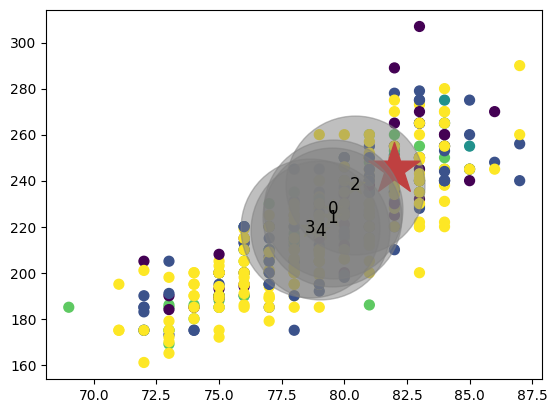

In [ ]:
XDn=np.array(([(5000000,37,82,245,45,17.8,0.5,1.4,0.4)]))
ydn=mkm.predict(XDn)

plt.scatter(XD[:, 2],XD[:, 3],c=ydc,s=50,cmap='viridis')
plt.scatter(XDn[:, 2],XDn[:, 3],marker='*',s=1500,facecolors='red')
plt.scatter(centroids[:, 2],centroids[:, 3],marker='*',s=200,facecolors='yellow')
plt.scatter(centroids[:,2],centroids[:,3],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i, c in enumerate (centroids):
  plt.text(c[2],c[3],str(i),fontsize=12,color='black',ha='center',va='center')

plt.show()

In [ ]:
#Se evalúa el modelo
cm=confusion_matrix(yd, ydp)
print("La matriz de confusión es: \n", cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
PredNeg=VN/(VN+FN)


print("La exactitud es:", Exactitud)
print("La sensibilidad es:", Sensibilidad)
print("La especificidad es:", Especificidad)
print("La precisión es:", Precision)
print("La tasa de error es:", TasaError)
print("La tasa de predicción negativa es:", PredNeg)

La matriz de confusión es: 
 [[227  28]
 [ 98  92]]
La exactitud es: 0.7168539325842697
La sensibilidad es: 0.4842105263157895
La especificidad es: 0.8901960784313725
La precisión es: 0.7666666666666667
La tasa de error es: 0.28314606741573034
La tasa de predicción negativa es: 0.6984615384615385


**Análisis de resultados**

Antes de ahondar en los análisis de cada modelo, resulta esencial realizar la distinción entre las variables empleadas. En primer lugar, las variables de entrada corresponden a:
* Salary: corresponde al salario anual percibido por cada jugador de la NBA.
* Age: se trata a la edad del jugador en años.
* Height:se refiere a la altura del jugador en pulgadas.
* Weight: corresponde al peso del jugador en libras.
* games_started: medida de rendimiento deportivo que indica el número de partidos que ha iniciado el jugador en temporada.
* Minutes_per_game: el número promedio de minutos que participa un jugador por partido.
* Assists: se trata de una medida de rendimiento que indica el número promedio de asistencias por jugador.
* Blocks: corresponde al número de bloqueos en promedio que realiza un jugador por partido.
* Steals: se refiere al número promedio de robos que el jugador realiza por partido.

Mientras que la variable de salida games_played es un indicador del numero total de partidos jugados en una temporada.
* Games_played.



**Modelo Naive Bayes**

De acuerdo con la base de datos suministrada, la cual indica si un jugador de la NBA supera el promedio de partidos jugados o no, se tomaron en cuenta 9 variables de entrada y 1 de salida. En esta fue posible ubicar 445 registros, de los que el 57,30% no superan el promedio de partidos jugados y el 42,70% restante sí. En términos generales, el modelo alcanzó una especificidad por encima del 90% (92,5%), cuya función es determinar aquellos que no sobrepasan el promedio (negación), que a su vez está sustentado por una tasa de error cercana al 20%. A su vez, la precisión del modelo es superior al 80% (85,7%), cuya función es indicar la capacidad del modelo para clasificar correctamente los casos positivos (superan promedio). Con respecto al análisis hipotético del jugador de la NBA, el modelo concluyó que sus características son causantes de que el individuo sea incapaz de superar el promedio de partidos jugados.

**Modelo Árbol de Decisión**

La matriz de confusión muestra una predominancia de los valores verdaderos negativos, equivalentes a 247 registros; esto contribuyó a que el modelo alcanzara una especificidad cercana al 100% (96,8%), la cual indica la clasificación correcta de los casos negativos. Por otro lado, la proporción de predicciones positivas también tuvo un alto desempeño, evidenciado en la exactitud equivalente al 95,5%, por ello la tasa de error no supera ni el 5%. Con respecto al número total de datos, el modelo destaca que 190 jugadores superan el promedio de partidos jugados, mientras que 255 no; el caso hipotético analizado indica que sí supera el promedio de games_played. Finalmente, se ubican 6 nodos puros con un gini del 0%, aspecto positivo para la homogeneidad y veracidad de los datos.

**Modelo clusterización**

Para la clasificación de los jugadores por el método de clusterización, se tomaron 5 clusters, teniendo en cuenta los 445 datos registrados. De esta manera, se encontró que la variable con mayor relevancia con respecto a games_played era age, con una correlación cercana al 71%; además, se observa una alta correlación entre height y weight, equivalente al 83%.

Con respecto a los clusters, se puede destacar que:
* El cluster 2 (contando desde 0) concentra el mayor salario de los jugadores.
* El cluster 4 (contando desde 0) concentra a los jugadores de menor edad.
* El cluster 4 (contando desde 0) concentra a los jugadores más altos en pulgadas.

Es importante destacar que la especificidad alcanzada es del 90% (89%), lo cual muestra la tendencia del modelo a clasificar a los jugadores que no superan el promedio de partidos jugados. A su vez, la tasa de error equivale al 28% aprox, cuyo bajo valor indica que el rendimiento del modelo es bueno, pues no se equivoca tanto en las predicciones.